In [73]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scopes import ScopeChannel, MitlBdots

folder=r"C:\\Users\\JHARE\\Google Drive\\MAGPIE\\data\\2018\\s0823_18 Plasma Gun TS\\scopes\\" #replace as necessary

def N(arr):
    return arr/arr.max()

class PlasmaGunScope:
    def __init__(self, shot, t0 = 0, folder = None):
        self.shot = shot
        self.Ekspla = ScopeChannel(shot, '2', 'A1', folder = folder)
        self.TS = ScopeChannel(shot, '2', 'D1', folder = folder)
        self.Pearson = ScopeChannel(shot, '2', 'B1', folder = folder)
        self.t0=t0
        
        self.Ekspla.time += 37 -t0
        self.TS.time += 37 -t0
        self.Pearson.time += -t0
        
        self.Pearson.data *= 2.07*10.2*10 #attenuation and calibration factor
    def plot(self, ax):
        ax.plot(self.Ekspla.time, N(self.Ekspla.data), lw = 2, c = 'g', label = 'Ekspla')
        ax.plot(self.TS.time, N(self.TS.data), lw = 2, c = 'b', label = 'Thomson')
        ax.plot(self.Pearson.time, -self.Pearson.data/1e3, lw = 2, c = 'k', label = 'Current')

## Scope channels for Plasma Gun

The plasma gun shots were carried out using a single scope. The are three relevant channels:
* EKSPLA timing diode for interferometry
* Pearson (self-integrating Rogowski) to measure current through the gun
* Thomson scattering diode from the Brewster window

`Scope Channel  Attenuators Delay` 

`Scope 2 Channel A1	Ekspla delay bench Diode	None		-37 ns	`

`Scope 2 Channel B1	Plasma gun pearson	      X2.07x10.2  ~0 ns`

`Scope 2 Channel D1    TS diode @ brewster	     None        -37 ns`

The Pearson has a sensitivity of 0.1 V/A.

"Scope - Delay = Real" OR “Scope=Real+Delay”

So the real time for the diodes is the scope time --37 ns, or +37 ns!


In [105]:
## Create a list of strings for every shot
shot_names = ['g0'+str(i) for i in range(16,29)] 
shot_names.pop(11) #g027 scopes not saved, pop it from the list
t0s = [830,830,500,460,320,290,1170,1060,1550,1400,1430,1410] #from excel list, edit as necessary

### Plot a single shot

In [108]:
sn=shot_names[0]

g016 = PlasmaGunScope(sn, t0 = t0s[0], folder = folder)

<IPython.core.display.Javascript object>


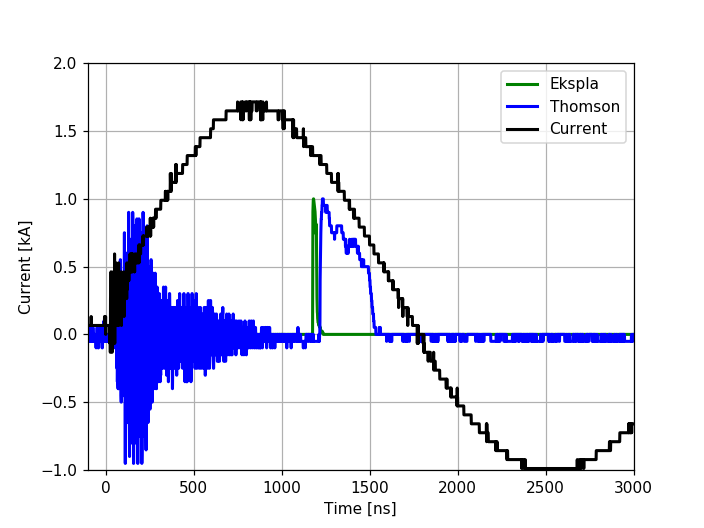

In [109]:
fig, ax = plt.subplots()
g016.plot(ax)

ax.set_xlim([-100,3000])
ax.set_ylim([-1,2])

ax.set_ylabel('Current [kA]')
ax.set_xlabel('Time [ns]')


ax.legend()
ax.grid()

### Plot current for multiple shots

In [106]:
shots = [PlasmaGunScope(sn, t0) for sn, t0 in zip(shot_names, t0s)]

<IPython.core.display.Javascript object>


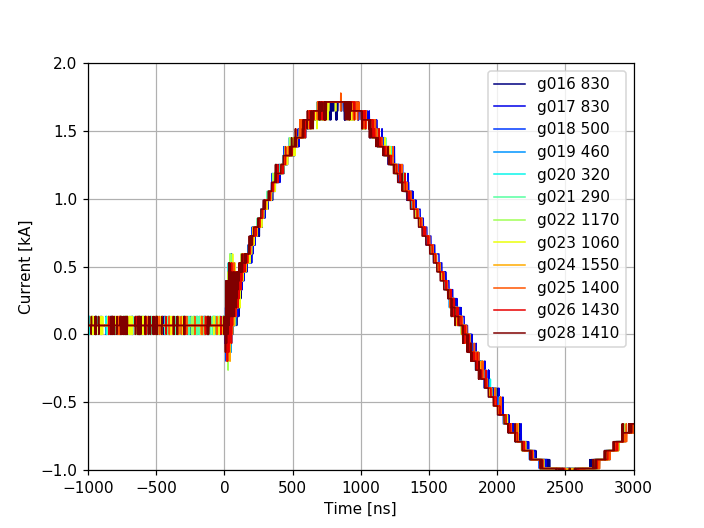

In [107]:
colors = plt.cm.jet(np.linspace(0,1,len(shots)))

fig, ax = plt.subplots()
for i, s in enumerate(shots):
    ax.plot(s.Pearson.time, -s.Pearson.data/1e3, lw = 1, c = colors[i], label = s.shot+' '+str(s.t0))
    
ax.set_xlim([-1000,3000])
ax.set_ylim([-1,2])

ax.set_ylabel('Current [kA]')
ax.set_xlabel('Time [ns]')


ax.legend()
ax.grid()

In [104]:
for s in shots:
    print(s.t0)

860
810
830
830
500
460
320
290
1170
1060
1550
1400
